In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier
from art.estimators.classification.scikitlearn import ScikitlearnExtraTreesClassifier

In [2]:
#샘플 데이터 로드
digits = load_digits()

In [3]:
#훈련, 테스트 데이터 나누기
x = digits.data
y = digits.target

In [4]:
#의사 결정 트리 선언
dclf = DecisionTreeClassifier(random_state=12)

#랜덤 포레스트 선언
rclf = RandomForestClassifier(random_state=12)

In [5]:
#의사 결정 트리 훈련
dclf.fit(x,y)

#랜덤 포레스트 훈련
rclf.fit(x,y)

RandomForestClassifier(random_state=12)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


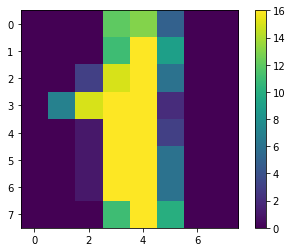

In [6]:
#공격 받기 전 의사 결정 트리 예측 결과 출력
print(dclf.predict(x[:30]))
plt.imshow(x[1].reshape(8,8))
plt.colorbar()

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


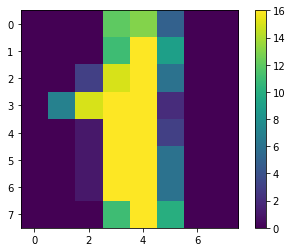

In [7]:
#공격 받기 전 랜덤 포레스트 예측 결과 출력
print(rclf.predict(x[:30]))
plt.imshow(x[1].reshape(8,8))
plt.colorbar()

In [8]:
#모든 공격을 적용하기 위한 분류기
dclf_art = SklearnClassifier(dclf)
rclf_art = SklearnClassifier(rclf)

#Decision Tree 공격 선언
attack = DecisionTreeAttack(dclf_art)
adv = attack.generate(x[:])

Decision tree attack:   0%|          | 0/1797 [00:00<?, ?it/s]

[5 4 4 ... 4 4 4]


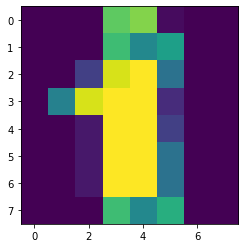

In [9]:
#공격 받고 나서 의사결정나무 예측 결과 출력
print(dclf.predict(adv))
plt.imshow(adv[1].reshape(8,8))

[0 1 2 ... 8 9 8]


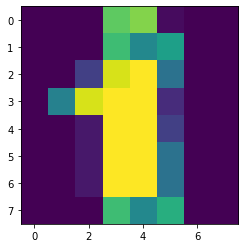

In [10]:
#공격 받고 나서 랜덤 포레스트 예측 결과 출력
print(rclf.predict(adv))
plt.imshow(adv[1].reshape(8,8))

In [11]:
#공격 받고 나서 의사결정나무 예측 결과 출력
print(dclf.predict(adv))
#공격 받고 나서 랜덤 포레스트 예측 결과 출력
print(rclf.predict(adv))

[5 4 4 ... 4 4 4]
[0 1 2 ... 8 9 8]


In [12]:
def print_result(x_test, y_test, y_pred, s):
    print('-------------------------------------------------------------------------')
    print('confusion matrix : {}'.format(s))
    print('-------------------------------------------------------------------------')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('-------------------------------------------------------------------------')
    print('classification report : {}'.format(s))
    print('-------------------------------------------------------------------------')
    print(classification_report(y_test, y_pred))

In [13]:
# 의사 결정 나무 공격 전 결과
d_pred = dclf.predict(x)
print_result(x, y, d_pred, 'decision tree')

-------------------------------------------------------------------------
confusion matrix : decision tree
-------------------------------------------------------------------------
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]

-------------------------------------------------------------------------
classification report : decision tree
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00     

In [14]:
# 의사 결정 나무 공격 후 결과
d_pred_adv = dclf.predict(adv)
print_result(x, y, d_pred_adv, 'decision tree')

-------------------------------------------------------------------------
confusion matrix : decision tree
-------------------------------------------------------------------------
[[  0   0   1   0   4 170   0   0   0   3]
 [  0   0  11   0 128   0  35   0   8   0]
 [  0  11   0   2 122   1  35   0   0   6]
 [  0   0  10   0 157   0  15   0   0   1]
 [  0  26  33   0   0   1   7 114   0   0]
 [  0   3  10  17   8   0 142   0   0   2]
 [  0 172   3   2   4   0   0   0   0   0]
 [  0   1 161   0  12   0   5   0   0   0]
 [  0   0  11   0 157   0   3   0   0   3]
 [  0   0  16   1 106  56   1   0   0   0]]

-------------------------------------------------------------------------
classification report : decision tree
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     178.0
           1       0.00      0.00      0.00     182.0
           2       0.00      0.00     

c:\users\좌\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# 랜덤 포레스트 공격 전 결과
r_pred = rclf.predict(x)
print_result(x, y, r_pred, 'random forest tree')

-------------------------------------------------------------------------
confusion matrix : random forest tree
-------------------------------------------------------------------------
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]

-------------------------------------------------------------------------
classification report : random forest tree
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00     

In [16]:
# 랜덤 포레스트  공격 후 결과
r_pred_adv = rclf.predict(adv)
print_result(x, y, r_pred_adv, 'random forest')

-------------------------------------------------------------------------
confusion matrix : random forest
-------------------------------------------------------------------------
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 179   0   0   0   0   2]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]

-------------------------------------------------------------------------
classification report : random forest
-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00     